Consider the file income.csv, explore the data, drop the columns that you consider useless for clustering and find the optimal clustering scheme.
The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook.
The notebook must include appropriate comments and must operate as follows:
1. Load the data file and explore the data, showing size, and data distributions
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt


In [1]:
import pandas as pd

df = pd.read_csv("income.csv")

print("Shapes:", df.shape)
print("Null rows:", df.shape[0] - df.dropna().shape[0])
print("Duplicated rows:", df.shape[0] - df.duplicated().shape[0])
display(df.info())
display(df.head(10))
display(df.describe())

Shapes: (7891, 11)
Null rows: 1
Duplicated rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7891 entries, 0 to 7890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7891 non-null   int64  
 1   Territorio  7890 non-null   object 
 2   NC_   -  0  7891 non-null   float64
 3   NC_  0- 10  7891 non-null   float64
 4   NC_ 10- 15  7891 non-null   float64
 5   NC_ 15- 26  7891 non-null   float64
 6   NC_ 26- 55  7891 non-null   float64
 7   NC_ 55- 75  7891 non-null   float64
 8   NC_ 75-120  7891 non-null   float64
 9   NC_120-inf  7891 non-null   float64
 10  Income_tot  7891 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 678.3+ KB


None

,Unnamed: 0,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0
5,5,Abbateggio,0.0,140.0,40.0,74.0,31.0,0.0,0.0,0.0,3517230.0
6,6,Abbiategrasso,5.0,4885.0,2610.0,7655.0,6245.0,674.0,436.0,198.0,552582690.0
7,7,Abetone Cutigliano,0.0,509.0,278.0,504.0,257.0,7.0,7.0,0.0,25274459.0
8,8,Abriola,0.0,406.0,189.0,251.0,73.0,0.0,0.0,0.0,11522386.0
9,9,Acate,0.0,3714.0,1506.0,984.0,415.0,19.0,18.0,5.0,73238945.0


,Unnamed: 0,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.00000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,3945.00000,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,2278.07982,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.00000,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,1972.50000,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,3945.00000,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,5917.50000,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,7890.00000,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


<Axes: >

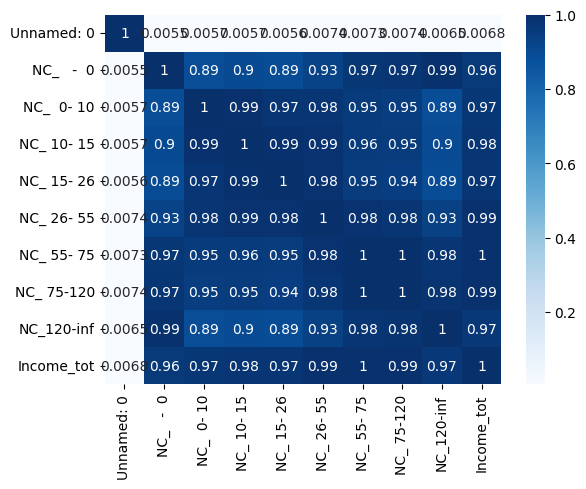

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

sns.heatmap(df.drop("Territorio", axis=1).corr().abs(), cmap="Blues", annot=True)

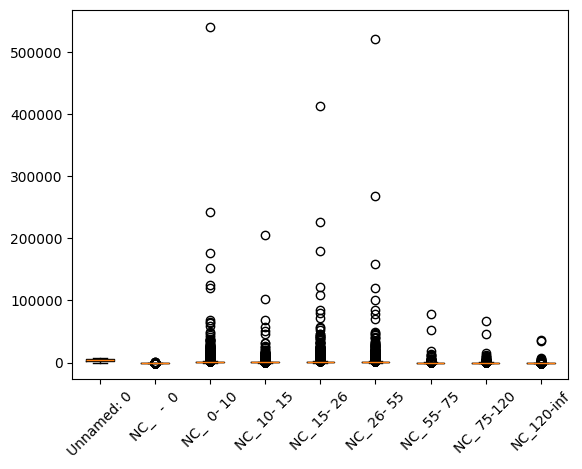

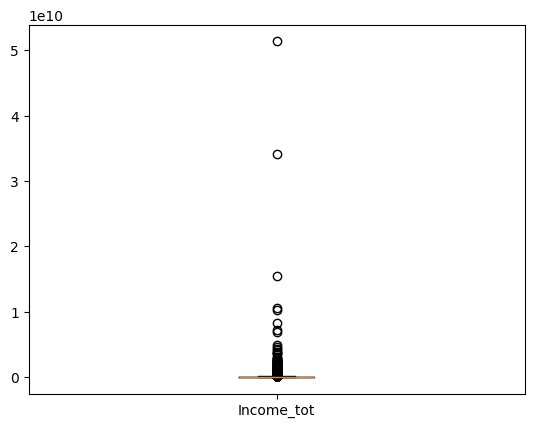

In [3]:
plt.boxplot(
    df.drop("Territorio", axis=1).iloc[:, 0:9],
    labels=df.drop("Territorio", axis=1).iloc[:, 0:9].columns,
)
plt.xticks(rotation=45)
plt.show()

plt.boxplot(df[["Income_tot"]], labels=df[["Income_tot"]].columns)
plt.show()

In [4]:
print("Unique Territorio values:", len(df["Territorio"].unique()))

Unique Territorio values: 7891


In [5]:
# sns.pairplot(df)

2. drop the columns that are not relevant for the clustering operation, if
any, and explain why you do that . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt


In [6]:
# Drop the one row that has nan value
df = df.dropna()
# Drop first column, because it's like an index column
# Drop Territorio because it's one value for each row, useless for clustering
# Drop Income_tot because contains information from other features, in fact has correlation > 0.96 among others
df = df.drop(["Unnamed: 0", "Territorio"], axis=1)
df.head(5)

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


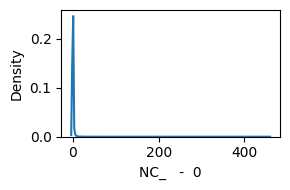

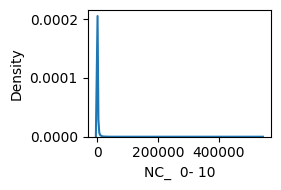

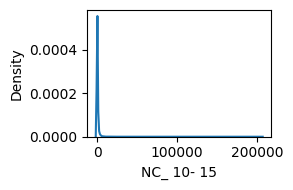

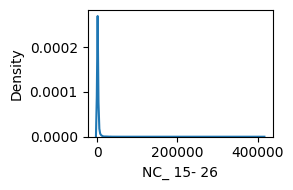

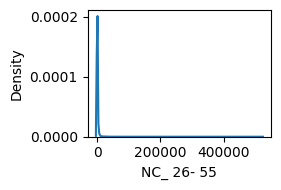

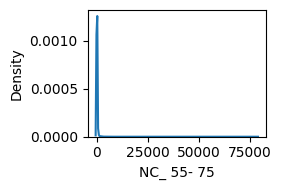

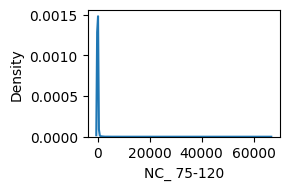

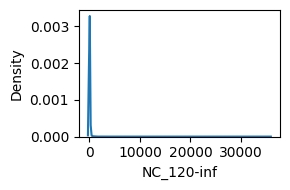

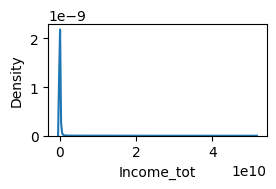

In [7]:
for col in df.columns:
    plt.figure(figsize=(3, 2))
    sns.kdeplot(df[col])
    plt.tight_layout()
    plt.show()

3. find the best clustering scheme and compute: a) the quality indexes
usual for clustering and b) the size of the clusters . . . . . . . . . . . . . . . . 4pt


In [14]:
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    make_scorer,
    silhouette_samples,
    silhouette_score,
)
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_components": range(2, 10, 1),
    "covariance_type": ["full", "tied", "diag", "spherical"],
}

scorings = [
    silhouette_score,
    # calinski_harabasz_score,
    # make_scorer(davies_bouldin_score, greater_is_better=False),
]

for score in scorings:
    grid = GridSearchCV(
        GaussianMixture(max_iter=300, reg_covar=1e-5),
        param_grid=param_grid,
        scoring=lambda estimator, X: score(X, estimator.predict(X)),
        cv=[(slice(None), slice(None))],
        n_jobs=-1,
    )
    grid.fit(df)
    print("Best params for {}:{}".format(score.__name__, grid.best_params_))
    print("Best {}:{}\n".format(score.__name__, grid.best_score_))

Best params for silhouette_score:{'covariance_type': 'full', 'n_components': 2}
Best silhouette_score:0.9964624519580559

Best params for calinski_harabasz_score:{'covariance_type': 'full', 'n_components': 9}
Best calinski_harabasz_score:52628.120060561516



4. apply a data transformation using the preprocessor below . . . . . . . 6pt
from sklearn.preprocessing import PowerTransformer, \
StandardScaler
from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
StandardScaler(with_std=False),
PowerTransformer(standardize=True),
)


In [9]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

preprocessor = make_pipeline(
    StandardScaler(with_std=False),
    PowerTransformer(standardize=True),
)

df_t = pd.DataFrame(preprocessor.fit_transform(df), columns=df.columns)
df_t.head(5)

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,-0.184597,1.422609,1.454348,1.458813,1.526559,1.773347,1.904047,1.953689,1.504527
1,-0.184597,-1.198026,-1.203369,-1.111934,-1.035439,-1.006524,-0.967425,-0.851739,-1.023741
2,-0.184597,-0.304401,-0.166117,0.166305,0.446485,0.979635,0.751146,1.320339,0.295482
3,-0.184597,0.992194,1.183631,1.199100,0.652641,0.795783,0.274001,0.218817,0.920123
4,-0.184597,-0.182907,-0.497660,-0.431843,-0.065127,-0.258583,-0.450351,-0.851739,-0.359246


5. find the best clustering scheme for the transformed data, as done in
step 3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt


In [13]:
param_grid = {
    "n_components": range(2, 10, 1),
    "covariance_type": ["full", "tied", "diag", "spherical"],
}

scorings = [
    silhouette_score,
    # calinski_harabasz_score,
    # make_scorer(davies_bouldin_score, greater_is_better=False),
]

for score in scorings:
    grid_t = GridSearchCV(
        GaussianMixture(max_iter=300, reg_covar=1e-5),
        param_grid=param_grid,
        scoring=lambda estimator, X: score(X, estimator.predict(X)),
        cv=[(slice(None), slice(None))],
        n_jobs=-1,
    )
    grid_t.fit(df_t)
    print("Best params for {}:{}".format(score.__name__, grid_t.best_params_))
    print("Best {}:{}\n".format(score.__name__, grid_t.best_score_))

Best params for silhouette_score:{'covariance_type': 'diag', 'n_components': 2}
Best silhouette_score:0.6056351741961477

Best params for calinski_harabasz_score:{'covariance_type': 'diag', 'n_components': 2}
Best calinski_harabasz_score:13250.171526405511



6. show together the results of the two clustering schemes obtained and
comment which of the two is better and why . . . . . . . . . . . . . . . . . . . . . 4pt


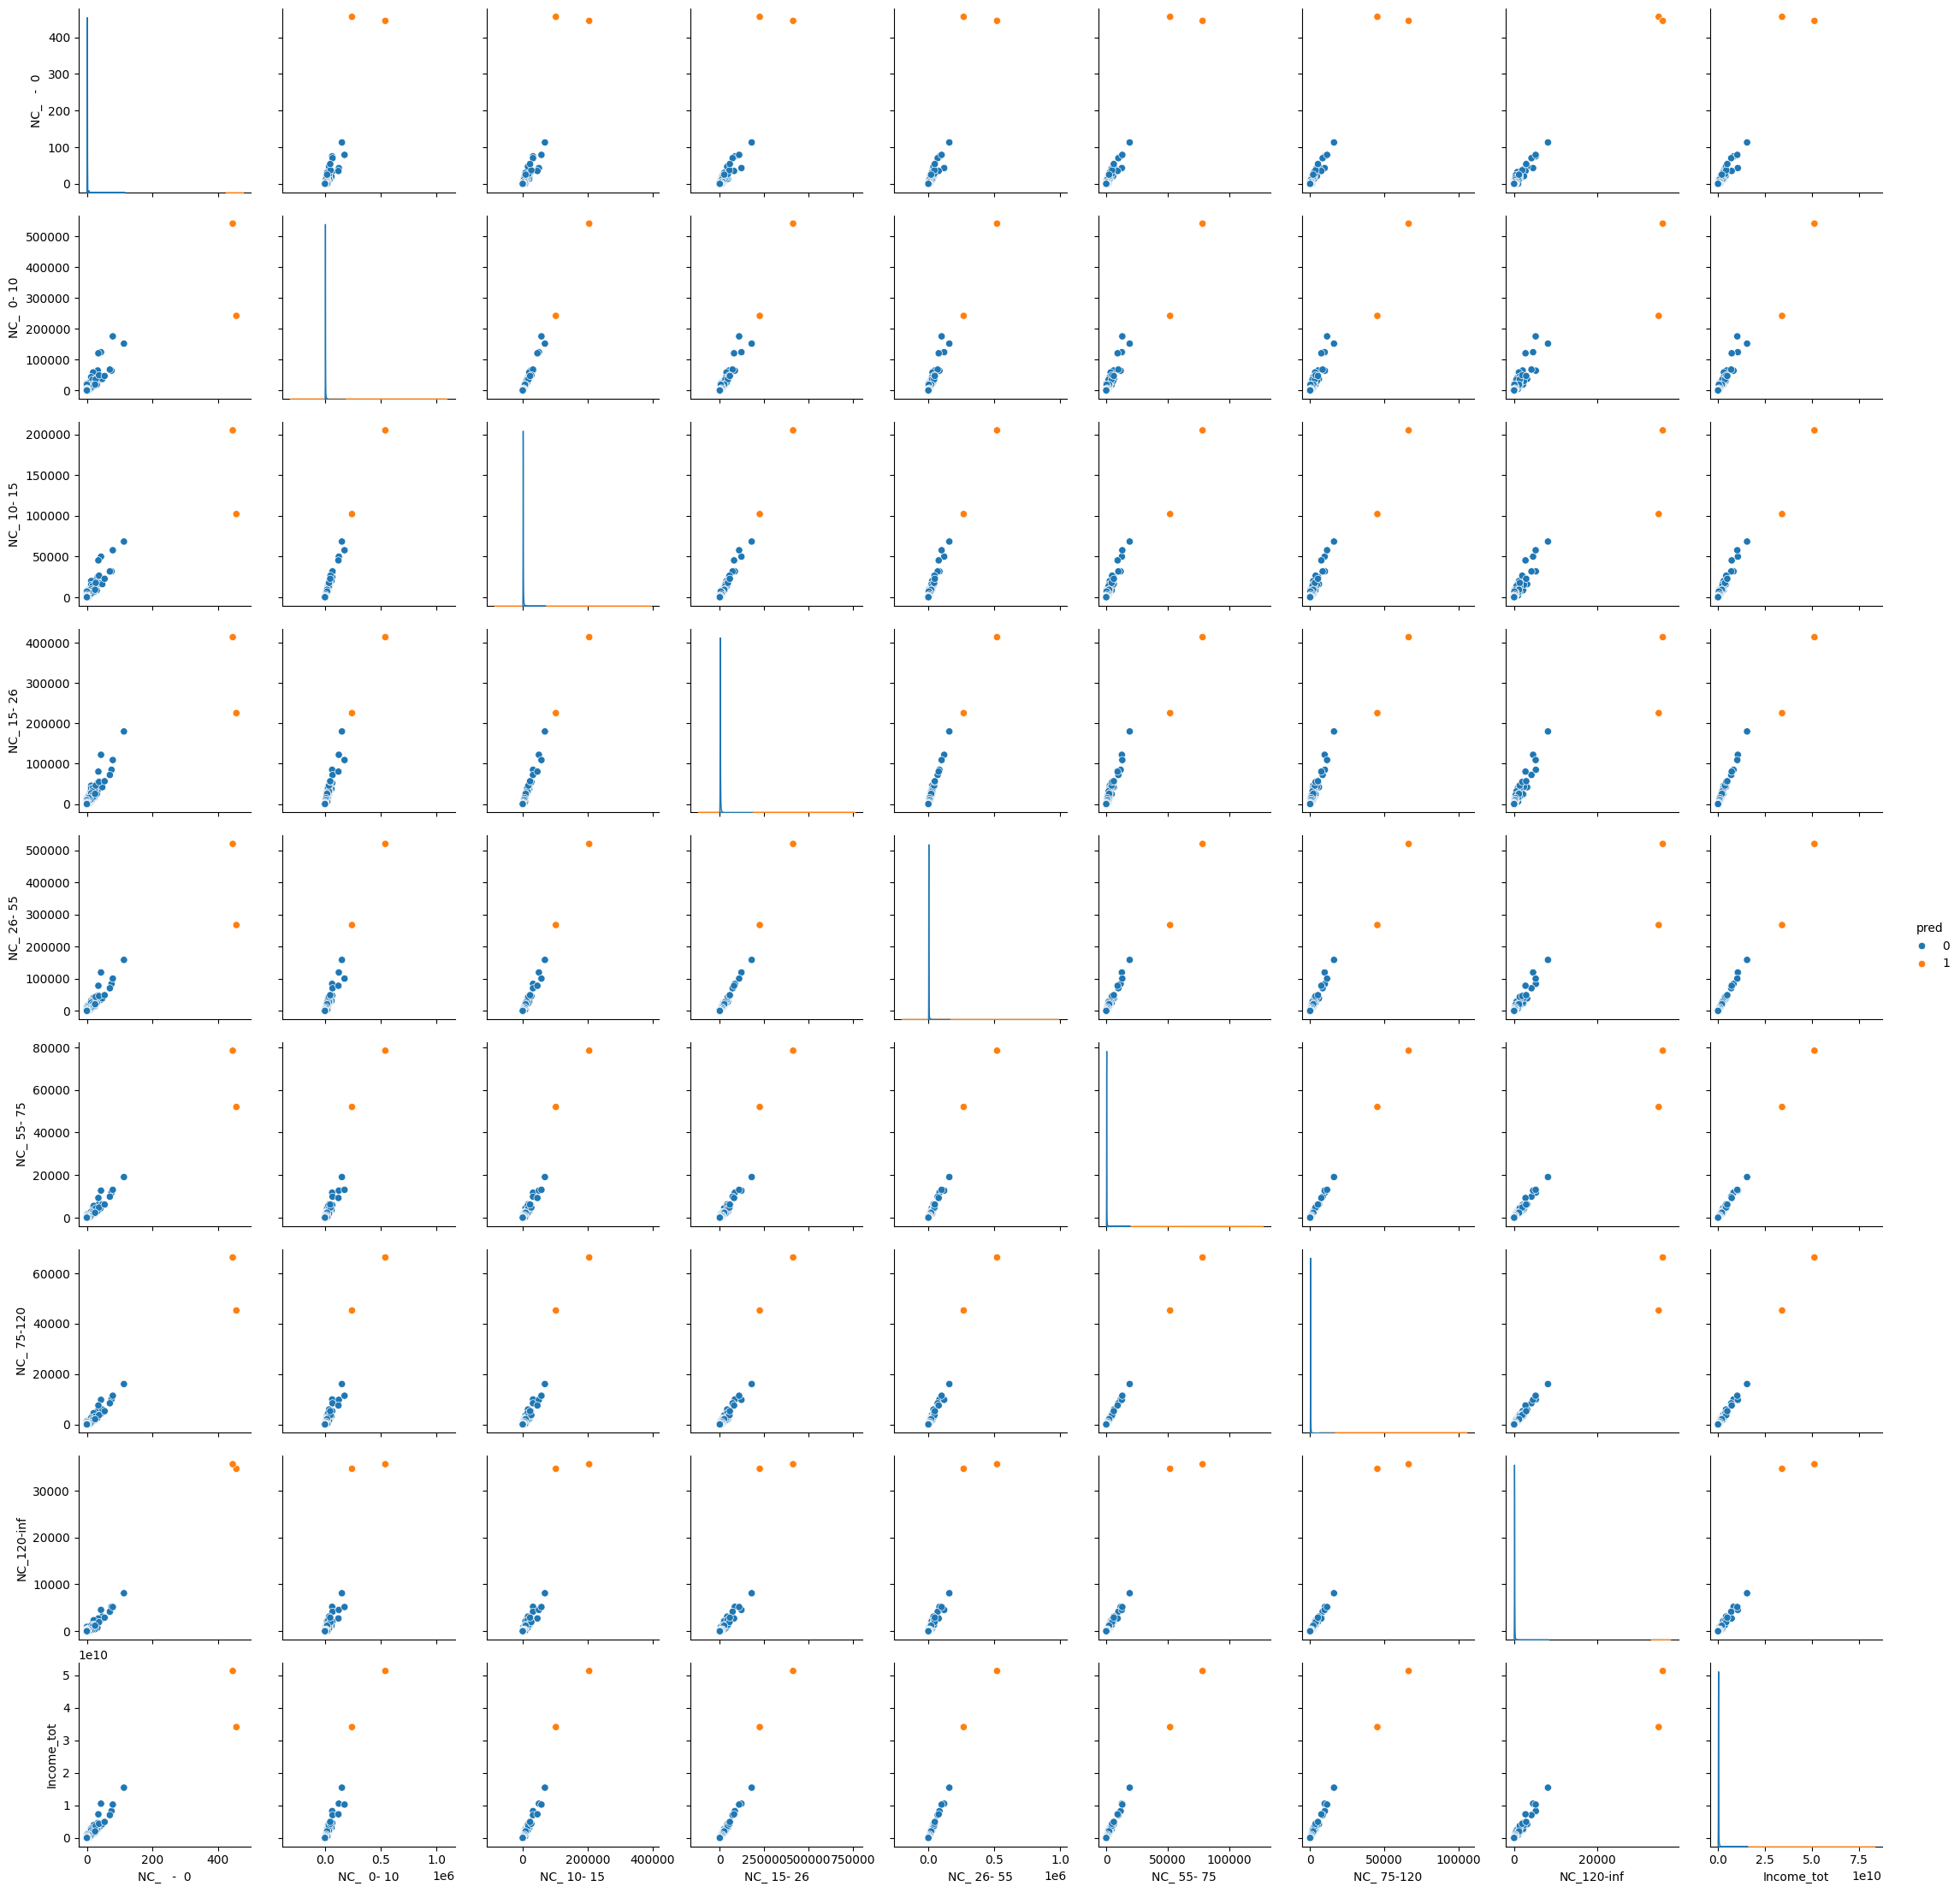

In [11]:
pred = grid.best_estimator_.predict(df)
sns.pairplot(df.assign(pred=pred), hue="pred")
plt.show()

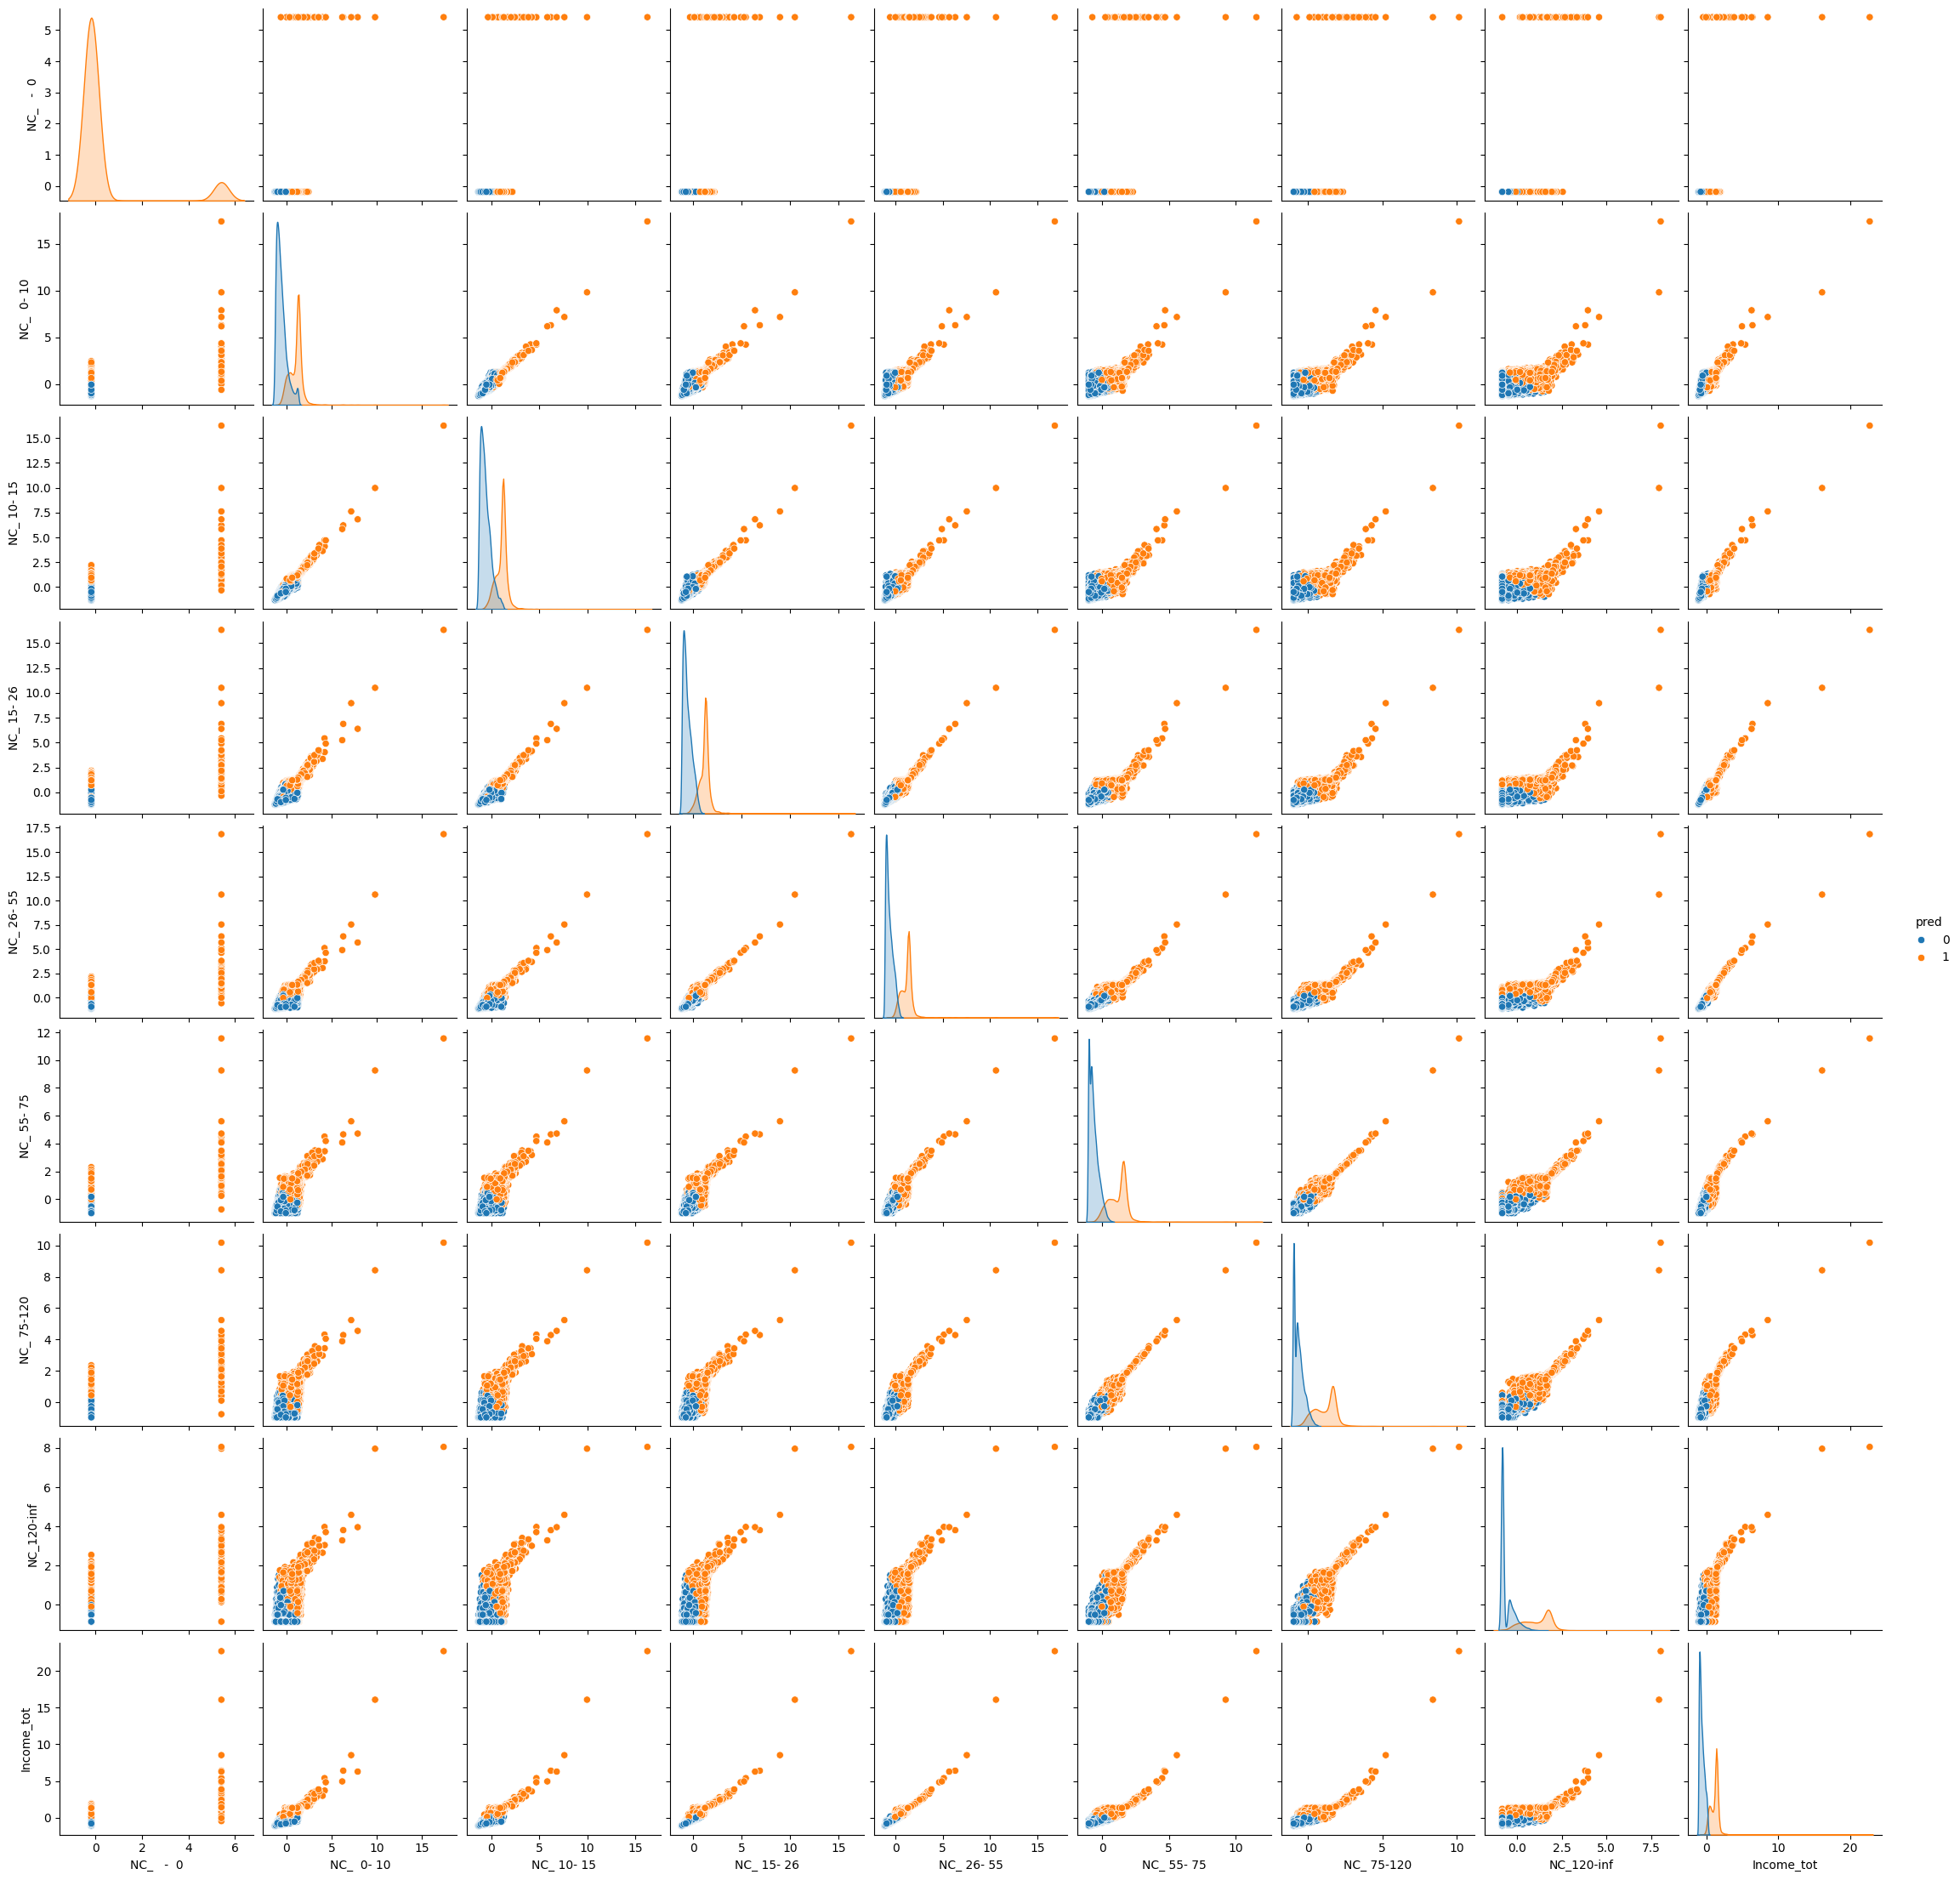

In [12]:
pred = grid_t.best_estimator_.predict(df_t)
sns.pairplot(df_t.assign(pred=pred), hue="pred")
plt.show()